## Nearest Neighbours

In these Notebook we shall implement K-Nearest Neighbours (KNN) on a Tumor Classification dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('TumorDataset.csv')

In [3]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
136,868223,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,...,25.48,86.16,546.7,0.1271,0.10280,0.10460,0.06968,0.1712,0.07343,NaN
332,897132,B,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,...,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522,NaN
82,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,...,33.62,211.70,2562.0,0.1573,0.60760,0.64760,0.28670,0.2355,0.10510,NaN
144,869254,B,10.750,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,...,20.72,77.79,441.2,0.1076,0.12230,0.09755,0.03413,0.2300,0.06769,NaN
84,8612080,B,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,...,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924,NaN
419,906290,B,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,NaN
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,...,18.45,63.30,275.6,0.1641,0.22350,0.17540,0.08512,0.2983,0.10490,NaN
179,873586,B,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,...,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,...,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
40,855167,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,...,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146,NaN


### Explore The Data

The dataset has lots of features, so lets explore the data and analysis it

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<AxesSubplot:>

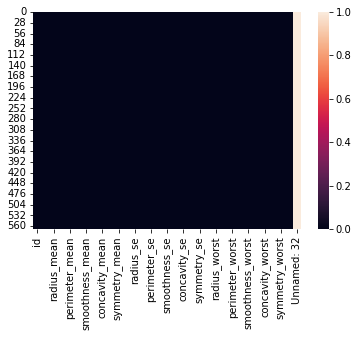

In [6]:
sns.heatmap(data.isnull())


In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

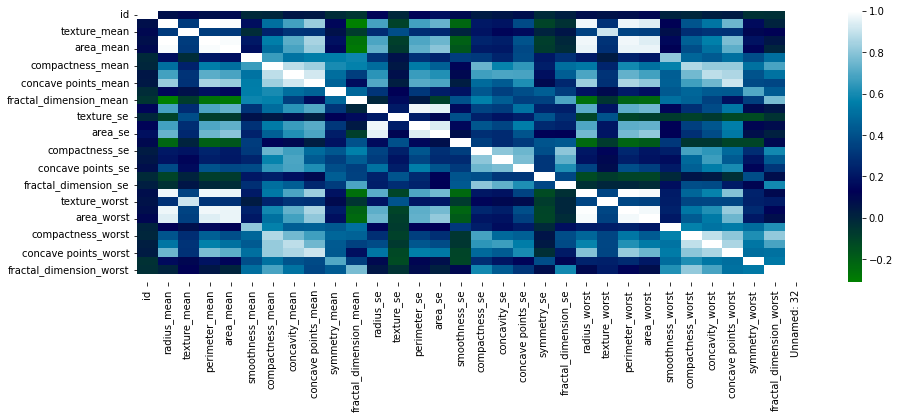

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),cmap="ocean")

#### The class label that we are supposed to predict is `diagnosis`

In [9]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Now let us visualize the Diagnosis data with help of Seaborn Countplot

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

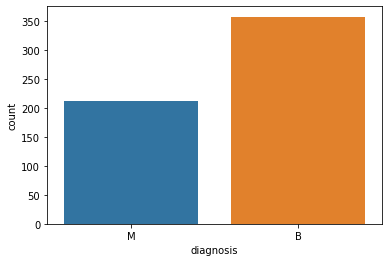

In [10]:
sns.countplot(data=data,x="diagnosis")

Here M means - Malignant and B means - Benign

#### I have already performed EDA on this dataset. And I recommened you guys to perform EDA before you proceed with train and test split and training the model. You can even open PULL REQUEST and I will merge your EDA

Let us drop some column that is unnecessary for our model

In [11]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [12]:
X = data.drop('diagnosis',axis=1)
Y = data['diagnosis']

In [13]:
maligant = data[data.diagnosis == "M"]
benign = data[data.diagnosis == "B"]

In [14]:
#let us plot Maligant and Benign data

In [15]:
maligant.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
47,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790
53,M,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
62,M,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,...,17.67,29.51,119.1,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320
108,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
280,M,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,...,23.72,35.90,159.8,1724.0,0.1782,0.3841,0.5754,0.1872,0.3258,0.09720
365,M,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,...,24.31,26.37,161.2,1780.0,0.1327,0.2376,0.2702,0.1765,0.2609,0.06735
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
34,M,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,...,20.21,27.26,132.7,1261.0,0.1446,0.5804,0.5274,0.1864,0.4270,0.12330
274,M,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,...,20.92,34.69,135.1,1320.0,0.1315,0.1806,0.2080,0.1136,0.2504,0.07948
516,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,...,21.86,26.20,142.2,1493.0,0.1492,0.2536,0.3759,0.1510,0.3074,0.07863


In [16]:
benign.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
455,B,13.380,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,...,15.05,41.61,96.69,705.6,0.11720,0.1421,0.07003,0.07763,0.2196,0.07675
55,B,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,...,12.84,22.47,81.81,506.2,0.12490,0.0872,0.09076,0.06316,0.3306,0.07036
363,B,16.500,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,...,18.13,25.45,117.20,1009.0,0.13380,0.1679,0.16630,0.09123,0.2394,0.06469
160,B,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,...,13.32,26.21,88.91,543.9,0.13580,0.1892,0.19560,0.07909,0.3168,0.07987
478,B,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,...,12.40,21.90,82.04,467.6,0.13520,0.2010,0.25960,0.07431,0.2941,0.09180
342,B,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,...,11.92,19.90,79.76,440.0,0.14180,0.2210,0.22990,0.10750,0.3301,0.09080
68,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.14820,0.4365,1.25200,0.17500,0.4228,0.11750
476,B,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,...,16.45,27.26,112.10,828.5,0.11530,0.3429,0.25120,0.13390,0.2534,0.07858
93,B,13.450,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,...,15.10,25.94,97.59,699.4,0.13390,0.1751,0.13810,0.07911,0.2678,0.06603
157,B,16.840,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,...,18.22,28.07,120.30,1032.0,0.08774,0.1710,0.18820,0.08436,0.2527,0.05972


Text(0, 0.5, 'Compactness Worst')

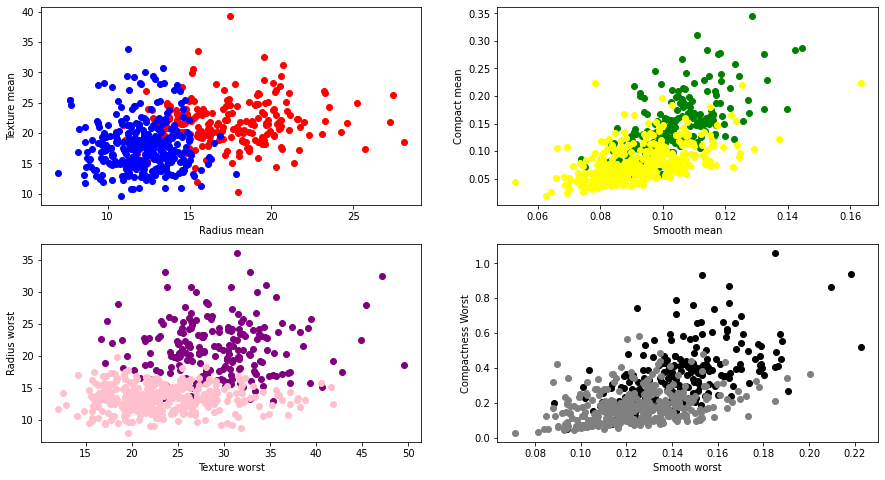

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(maligant.radius_mean,maligant.texture_mean,color="red")
plt.scatter(benign.radius_mean,benign.texture_mean,color="blue")
plt.xlabel("Radius mean")
plt.ylabel("Texture mean")

plt.subplot(2,2,2)
plt.scatter(maligant.smoothness_mean,maligant.compactness_mean,color="green")
plt.scatter(benign.smoothness_mean,benign.compactness_mean,color="yellow")
plt.xlabel("Smooth mean")
plt.ylabel("Compact mean")

plt.subplot(2,2,3)	
plt.scatter(maligant.texture_worst,maligant.radius_worst,color="purple")
plt.scatter(benign.texture_worst,benign.radius_worst,color="pink")
plt.xlabel("Texture worst")
plt.ylabel("Radius worst")

plt.subplot(2,2,4)	
plt.scatter(maligant.smoothness_worst,maligant.compactness_worst,color="black")
plt.scatter(benign.smoothness_worst,benign.compactness_worst,color="grey")
plt.xlabel("Smooth worst")
plt.ylabel("Compactness Worst")

In [18]:
#Let us Scale the numeric data

### Scaling And Encoding

In [19]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

minmaxsca = MinMaxScaler()
labelenco = LabelEncoder()

In [20]:
x = minmaxsca.fit_transform(X)
y = labelenco.fit_transform(Y)

### Split The Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

### Train KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [25]:
model.score(X_train,y_train)

0.9706546275395034

In [26]:
model.score(X_test,y_test)

0.9761904761904762

In [27]:
from sklearn.metrics import accuracy_score,classification_report

### Let us check which n_neighbor value fits the best for our model

Text(0, 0.5, 'Accuracy')

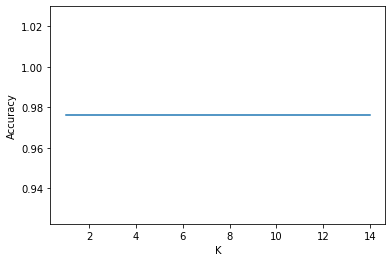

In [28]:
accuracy = []
for k_value in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors = k_value)
    knn_model.fit(X_train,y_train)
    predict = model.predict(X_test)
    accuracy.append(accuracy_score(y_true=y_test,y_pred=predict))
    
plt.plot(range(1,15),accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")